In [1]:
%matplotlib inline

## Standardization (mean removal + variance scaling)
- This is a common requirement for most scikit models.

In [4]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -2.,  3.],
                    [ 4.,  5.,  6.],
                    [ 7.,  8., -9.]])

X_scaled = preprocessing.scale(X_train)
print(X_scaled)

[[-1.22474487 -1.35244738  0.46291005]
 [ 0.          0.31822291  0.9258201 ]
 [ 1.22474487  1.03422447 -1.38873015]]


In [5]:
# scaled data 0 mean, unit variance

print(X_scaled.mean(axis=0), X_scaled.std(axis=0))

[0.00000000e+00 1.48029737e-16 0.00000000e+00] [1. 1. 1.]


## [Standard Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) 
- uses Scikit's transformer API to find the mean & std deviation on a dataset for re-use later. This is ideal for Pipelines.
- you can disable either centering or scaling with ```with_mean=False``` or ```with_std=False```.

In [7]:
scaler = preprocessing.StandardScaler().fit(X_train)

print(scaler, "\n", scaler.mean_, "\n", scaler.scale_)
print(scaler.transform(X_train))

StandardScaler() 
 [4.         3.66666667 0.        ] 
 [2.44948974 4.18993503 6.4807407 ]
[[-1.22474487 -1.35244738  0.46291005]
 [ 0.          0.31822291  0.9258201 ]
 [ 1.22474487  1.03422447 -1.38873015]]


## Scaling Features with [Min Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) and [Max Abs Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)
- This increases data robustness to small std deviations and preserves zero entries in sparse data.
- Below: scale toy matrix to ```[0,1]```.

In [8]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

- The instance can be reused on data unseen during the fit operation.

In [9]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

- attributes:

In [11]:
print(min_max_scaler.scale_, "\n", min_max_scaler.min_)

[0.5        0.5        0.33333333] 
 [0.         0.5        0.33333333]


- [Max Abs Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler) scales using a [-1,+1] range. It is meant for data that is already zero-centered or sparse.

In [13]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
print(X_train_maxabs)

X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
print(X_test_maxabs)

print(max_abs_scaler.scale_)

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
[[-1.5 -1.   2. ]]
[2. 1. 2.]


## Non-linear transforms
- quantile & power transforms are based on monotonic feature transformations, thereby preserving the rank of values along each feature.

- [Quantile transforms](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer) put all features into a specified distribution using $G^{-1}(F(X))$ where _F_ is a cumulative distribution function and $G^{-1}$ is the [quantile function](https://en.wikipedia.org/wiki/Quantile_function) of the target function. They smooth out unusual distributions. It can, however, distort correlatioins & distances between/across features.

- [Power transforms]() are parametric transformers that can map data from any distributin to near-Gaussian distributions.

## Map to a uniform distribution

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans        = quantile_transformer.fit_transform(X_train)
X_test_trans         = quantile_transformer.transform(X_test)

np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

/home/bjpcjp/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([4.3, 5.1, 5.8, 6.5, 7.9])

In [15]:
# corresponds to sepal length (in cm). 
# Once the transform is applied, the data should resemble the percentages.
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

In [16]:
# confirm with independent test set
print(np.percentile(X_test[:, 0],       [0, 25, 50, 75, 100]))
print(np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100]))

[4.4   5.125 5.75  6.175 7.3  ]
[0.01351351 0.25112613 0.47972973 0.60472973 0.94144144]


## [Power Transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer): Map to a Gaussian distribution
- Two transforms are available.
    - The Yeo-Johnson transform: $\begin{split}x_i^{(\lambda)} =
\begin{cases}
 [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
\ln{(x_i + 1)} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
-[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
 - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
\end{cases}\end{split}$
    - The Box-Cox transform: $\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}$
    

In [17]:
# example Box-Cox transform:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
print(X_lognormal)
pt.fit_transform(X_lognormal)

[[1.28331718 1.18092228 0.84160269]
 [0.94293279 1.60960836 0.3879099 ]
 [1.35235668 0.21715673 1.09977091]]


array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612415],
       [ 0.69420009, -0.84857822,  0.10051454]])

## [Example](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)
- Using Box-Cox and Yeo-Johnson transforms to map various distributions to a normal curve.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [19]:
N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)
bc  = PowerTransformer(method='box-cox')
yj  = PowerTransformer(method='yeo-johnson')
# n_quantiles set to training set size, not default value, to avoid warning being raised by this example
qt = QuantileTransformer(n_quantiles=500, 
                         output_distribution='normal',
                         random_state=rng)
size = (N_SAMPLES, 1)

X_lognormal = rng.lognormal(size=size)
df = 3
X_chisq     = rng.chisquare(df=df, size=size)
a = 50
X_weibull   = rng.weibull(a=a, size=size)
loc = 100
X_gaussian  = rng.normal(loc=loc, size=size)
X_uniform   = rng.uniform(low=0, high=1, size=size)
loc_a, loc_b = 100, 105
X_a, X_b    = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal   = np.concatenate([X_a, X_b], axis=0)

distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

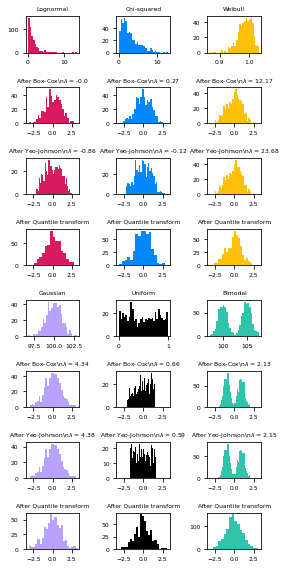

In [21]:
colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [( 0,  3,  6,  9), 
             ( 1,  4,  7, 10), 
             ( 2,  5,  8, 11), 
             (12, 15, 18, 21),
             (13, 16, 19, 22), 
             (14, 17, 20, 23)]

axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X         = distribution
    X_train, X_test = train_test_split(X, test_size=.5)
    X_trans_bc      = bc.fit(X_train).transform(X_test) # power xform & quantile xform
    lmbda_bc        = round(bc.lambdas_[0], 2)
    X_trans_yj      = yj.fit(X_train).transform(X_test)
    lmbda_yj        = round(yj.lambdas_[0], 2)
    X_trans_qt      = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

## Normalization
- Defined as scaling individual samples to a unit norm. It is useful when you need a quadratic norm, for example a dot product or other kernel to measure the similarity of any pair of samples.
- [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) = simple utility function
- [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) = class from the ```preprocessing``` module.

In [22]:
# normalize
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [23]:
# Normalizer
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
print(normalizer)
normalizer.transform(X)
normalizer.transform([[-1.,  1., 0.]])

Normalizer()


array([[-0.70710678,  0.70710678,  0.        ]])

## [Category Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)
- converts categorical features to integers (0 to n_features-1)

In [24]:
enc = preprocessing.OrdinalEncoder()
X = [['male',   'from US',     'uses Safari'], 
     ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

## [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)
- Integer datatypes can't be used with all scikit estimators (some expect continuous inputs & would interpret the categories as being *ordered*.)
- One-hot encoding converts each category with ```n_categories``` possible values into ```n_categories``` binary features - one being 1, the rest being 0.

In [25]:
enc = preprocessing.OneHotEncoder()
X = [['male',   'from US',     'uses Safari'], 
     ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US',     'uses Safari'],
               ['male',   'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

- Feature values can be inferred automatically & found in ```categories_```.

In [26]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

- You can explicitly specify this with ```categories```.

In [27]:
genders   = ['female',      'male']
locations = ['from Africa', 'from Asia',    'from Europe', 'from US']
browsers  = ['uses Chrome', 'uses Firefox', 'uses IE',     'uses Safari']

enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

# Note that for there are missing categorical values for the 2nd and 3rd feature
X = [['male',   'from US',     'uses Safari'], 
     ['female', 'from Europe', 'uses Firefox']]

enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

- You can also encode each column into ```n_categories-1``` columns (instead of ```n_categories```) by using ```drop```. This allows you to specify a category for each feature to be dropped.
- This helps avoid colinearity in an input matrix for some classifiers such as non-regularized regression.

In [28]:
X = [['male',   'from US',     'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]

drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
print(drop_enc.categories_)
print(drop_enc.transform(X).toarray())

[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]
[[1. 1. 1.]
 [0. 0. 0.]]


- Use ```drop='if_binary'``` for features with 2 categories.
- Below, in the transformed _X_; the 1st column is the encoding of the feature with categories 'male'/'female'. The remaining six columns is the encoding of the 2 features with 3 categories each.

In [29]:
X = [['male',   'US',     'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia',   'Chrome']]

drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
print(drop_enc.categories_)
print(drop_enc.transform(X).toarray())

[array(['female', 'male'], dtype=object), array(['Asia', 'Europe', 'US'], dtype=object), array(['Chrome', 'Firefox', 'Safari'], dtype=object)]
[[1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0.]]


## [K-Bins Quantization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer)
- Partitions continuous features into discrete values.
- One-hot encoded quantized features can make a model more expressive while maintaining interpretability.
- Outputs are by default one-hot encoded into a sparse matrix. (configure with ```encode```).
- Quantization is similar to building histograms for continuous data - but histograms focus on *counting* features in bins (while quantization focuses on assigning feature values to those bins.)

In [31]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], 
                                     encode='ordinal').fit(X)

est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

- The quantizer can use different binning strategies via ```strategy```:
    - 'uniform' = constant-width bins
    - 'quantile' = equally populated bins
    - 'kmeans' = defines bins based on clustering algorithm

## Example: [K-Bins Quantization](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html#sphx-glr-auto-examples-preprocessing-plot-discretization-py)
- compares prediction results of linear regression and decision tree, with/without quantizatin.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

rnd      = np.random.RandomState(42)
X        = rnd.uniform(-3, 3, size=100)
y        = np.sin(X) + rnd.normal(size=len(X)) / 3
X        = X.reshape(-1, 1)
enc      = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

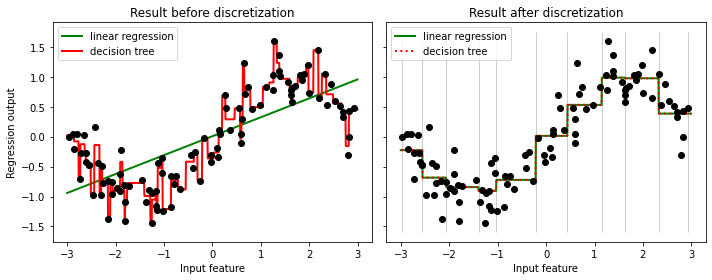

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg  = LinearRegression().fit(X, y)

ax1.plot(line, reg.predict(line), 
         linewidth=2, 
         color='green',
         label="linear regression")

reg = DecisionTreeRegressor(min_samples_split=3, 
                            random_state=0).fit(X, y)

ax1.plot(line, 
         reg.predict(line), 
         linewidth=2, 
         color='red',
         label="decision tree")

ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg         = LinearRegression().fit(X_binned, y)

ax2.plot(line, 
         reg.predict(line_binned), 
         linewidth=2, 
         color='green',
         linestyle='-', 
         label='linear regression')

reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)

ax2.plot(line, 
         reg.predict(line_binned), 
         linewidth=2, 
         color='red',
         linestyle=':', 
         label='decision tree')

ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

## Example: [Feature Quanitization](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html#sphx-glr-auto-examples-preprocessing-plot-discretization-classification-py)
- Each feature is decomposed into equal-width bins
- Discrete values are one-hot encoded & given to a linear classifier.
- This preprocessing enables non-linear behavior even though the classifier is linear
- First two rows: linearly non-separable datasets (moons & concentric circles)
- Third row: approx linearly separable.
- Training points = solid colors; test points = semi-transparent. Classification accuracy shown in lower right.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [35]:
h = .02  # step size in the mesh


def get_name(estimator):
    name = estimator.__class__.__name__
    if name == 'Pipeline':
        name = [get_name(est[1]) for est in estimator.steps]
        name = ' + '.join(name)
    return name

# list of (estimator, param_grid), where param_grid is used in GridSearchCV
classifiers = [
    (LogisticRegression(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (LinearSVC(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
    (make_pipeline(
        KBinsDiscretizer(encode='onehot'),
        LogisticRegression(random_state=0)), {
            'kbinsdiscretizer__n_bins': np.arange(2, 10),
            'logisticregression__C':    np.logspace(-2, 7, 10),
        }),
    (make_pipeline(
        KBinsDiscretizer(encode='onehot'), LinearSVC(random_state=0)), {
            'kbinsdiscretizer__n_bins':    np.arange(2, 10),
            'linearsvc__C':                np.logspace(-2, 7, 10),
        }),
    (GradientBoostingClassifier(n_estimators=50, 
                                random_state=0), {
        'learning_rate': np.logspace(-4, 0, 10)
    }),
    (SVC(random_state=0), {
        'C': np.logspace(-2, 7, 10)
    }),
]

In [36]:
names = [get_name(e) for e, g in classifiers]

n_samples = 100
datasets = [
    make_moons(         n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(       n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(n_samples=n_samples, 
                        n_features=2, 
                        n_redundant=0,
                        n_informative=2, 
                        random_state=2,
                        n_clusters_per_class=1)]


dataset 0
---------
LogisticRegression: 0.86
LinearSVC: 0.86
KBinsDiscretizer + LogisticRegression: 0.86
KBinsDiscretizer + LinearSVC: 0.92
GradientBoostingClassifier: 0.90
SVC: 0.94

dataset 1
---------
LogisticRegression: 0.40
LinearSVC: 0.40
KBinsDiscretizer + LogisticRegression: 0.88
KBinsDiscretizer + LinearSVC: 0.86
GradientBoostingClassifier: 0.80
SVC: 0.84

dataset 2
---------
LogisticRegression: 0.98
LinearSVC: 0.98
KBinsDiscretizer + LogisticRegression: 0.94
KBinsDiscretizer + LinearSVC: 0.94
GradientBoostingClassifier: 0.88
SVC: 0.98


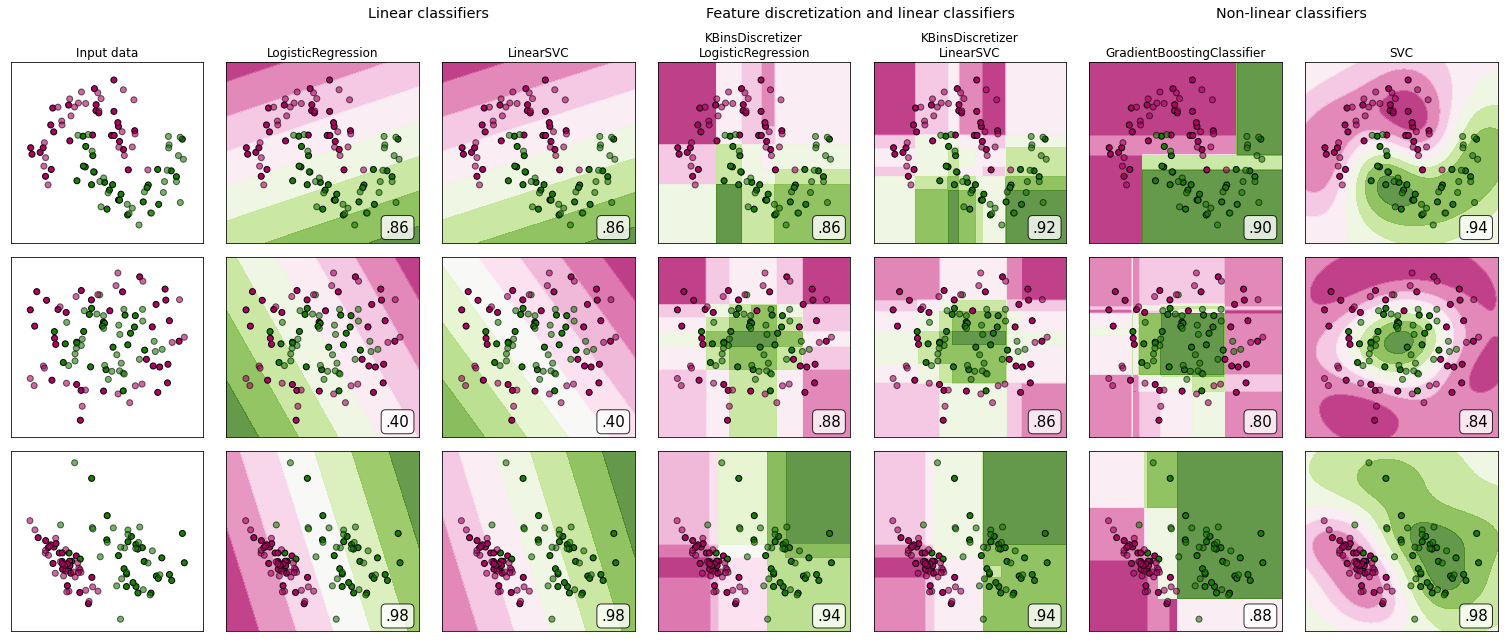

In [37]:
fig, axes = plt.subplots(nrows=len(datasets), ncols=len(classifiers) + 1,
                         figsize=(21, 9))

cm = plt.cm.PiYG
cm_bright = ListedColormap(['#b30065', '#178000'])

# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    print('\ndataset %d\n---------' % ds_cnt)

    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.5, random_state=42)

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), 
        np.arange(y_min, y_max, h))

    # plot the dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot training & test points
    ax.scatter(X_train[:, 0], 
               X_train[:, 1], 
               c=y_train, cmap=cm_bright,           edgecolors='k')
    ax.scatter(X_test[:, 0], 
               X_test[:, 1], 
               c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in \
            enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('%s: %.2f' % (name, score))

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # plot the training points
        ax.scatter(X_train[:, 0], 
                   X_train[:, 1], 
                   c=y_train, cmap=cm_bright, edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], 
                   X_test[:, 1], 
                   c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(' + ', '\n'))
        ax.text(0.95, 0.06, 
                ('%.2f' % score).lstrip('0'), 
                size=15,
                bbox=dict(boxstyle='round', 
                          alpha=0.8, 
                          facecolor='white'),
                transform=ax.transAxes, 
                horizontalalignment='right')


plt.tight_layout()

plt.subplots_adjust(top=0.90)
suptitles = [
    'Linear classifiers',
    'Feature discretization and linear classifiers',
    'Non-linear classifiers',
]
for i, suptitle in zip([1, 3, 5], suptitles):
    ax = axes[0, i]
    ax.text(1.05, 1.25, suptitle, transform=ax.transAxes,
            horizontalalignment='center', size='x-large')
plt.show()

## Example: [KBins Quantizer Strategy Options](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html#sphx-glr-auto-examples-preprocessing-plot-discretization-strategies-py)
- compares 'uniform', 'quantile' and 'kmeans' quantization strategies.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs

strategies   = ['uniform', 'quantile', 'kmeans']
n_samples    = 200
centers_0    = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1    = np.array([[0, 0], [3, 1]])
random_state = 42
X_list       = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    
    make_blobs(n_samples    = [n_samples // 10, n_samples * 4 // 10,
                               n_samples // 10, n_samples * 4 // 10],
               cluster_std  = 0.5, 
               centers      = centers_0,
               random_state = random_state)[0],
    
    make_blobs(n_samples   = [n_samples // 5, n_samples * 4 // 5],
               cluster_std = 0.5, 
               centers     = centers_1,
               random_state = random_state)[0],
]

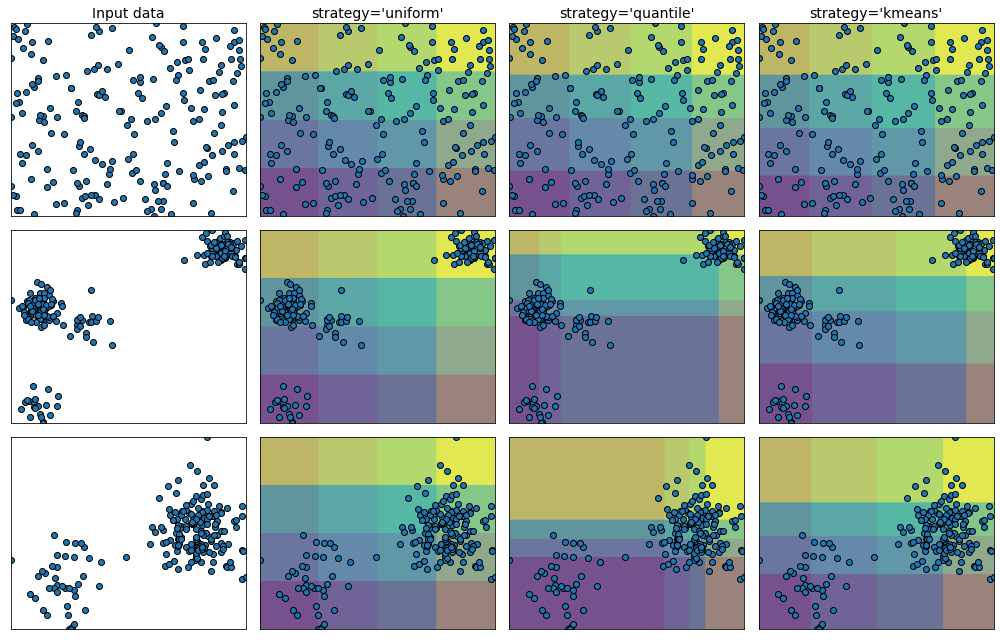

In [39]:
figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):

    ax = plt.subplot(len(X_list), 
                     len(strategies) + 1, i)
    ax.scatter(X[:, 0], 
               X[:, 1], 
               edgecolors='k')
    
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300))

    grid = np.c_[xx.ravel(), 
                 yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, 
                               encode='ordinal', 
                               strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=.5)

        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy, ), size=14)

        i += 1

plt.tight_layout()
plt.show()

## [Feature Binarization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer)
- Defined as thresholding numeric features into boolean values.
- This is valuable when downstream estimators assume their input data is a multi-valued Bernoulli distribution.
- A [binarize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html#sklearn.preprocessing.binarize) utility function is also available.

In [40]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
#binarizer
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [42]:
# adjusting the binarizer threshold
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

## [Generating polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)
- Useful when you need to add complexity to a model by considering nonlinear dataset features.
- This class returns a features high-order and interaction terms.

In [43]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

- Transforming features of _X_ from $(X_1, X_2)$ to $(1, X_1, X_2, X_1^2, X_1X_2, X_2^2)$

In [44]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

- Polynomial features are used implicitly in [kernel methods](https://en.wikipedia.org/wiki/Kernel_method) when using polynomial [kernel functions](https://scikit-learn.org/stable/modules/svm.html#svm-kernels). 

## [Custom Transforms](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)
- Allows you use a Python function as a transformer. Below: a log transform.

In [45]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
X           = np.array([[0, 1], [2, 3]])

transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])